#### this notebook is used to create dynamic spectra numpy arrays from the onsala data using the scripts by Gary

In [1]:
from loadcorrprocess import *

In [6]:
basespec = '/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/' 
#folder where the data files are (local FDV folder)
# basespec = '../data/' #using bin folder to get files
data_folder= basespec+''
fig_folder = basespec+'Figs/'
       

#%% Load the data
print('data_folder:',data_folder)
# print(glob.glob(data_folder+'*.hdf5'))
#to process all files: uncomment this and indent all lines you want into the for.
fileL = sorted(glob.glob(data_folder+'*'+ '.hdf5'))
print(fileL)
# for file_idx in range(1):#len(fileL)):
    
filename = fileL[0]
print('Loading %s'%filename)
if 'Corr' in filename:
    print(f"{filename} is a correlator file")
    # break
realname=filename.split('/')[-1] ## remove path
reallabel=realname.split('.')[0] ## remove suffix
reallabel=reallabel.split(' ')[0] ## remove gary's name this should be adjusted if needed
print('reallabel:',reallabel)

data_folder: /Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/
['/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTNorthEastUpperband-2024-04-29T12_37_46 Gary Hovey.hdf5', '/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTSouthWestUpperband-2024-04-29T12_37_48 Gary Hovey.hdf5', '/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTSouthWestUpperband-2024-04-30T00_00_02 Gary Hovey.hdf5', '/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTSouthWestUpperband-2024-05-01T00_00_01 Gary Hovey.hdf5', '/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTSouthWestUpperband-2024-05-01T07_53_57 Gary Hovey.hdf5', '/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTSouthWestUpperband-2024-05-02T00_00_01 Gary Hovey.hdf5', '/Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/ottCorrDataMonitor

In [7]:
if 'SouthWest' in filename:
    print('SW')
    mode = 'SA_SW'

elif 'NorthEast' in filename:
    mode = 'SA_NE'
else:
    print('Correlator mode')
    mode = 'Correlator'

if 'Corr' in filename:    
    aveX, f_GHz, tUtcBytes, az_degX, el_degX, mjd,\
                satTles, aveY, az_degY, el_degY, mjd,\
                XYave, hdrD= getCorrData(filename)
    f_corr = f_GHz
    f_GHz=np.linspace(10.7,10.7+2,len(f_GHz))
    mjd_corr = mjd
    t = bytes2mdates(tUtcBytes)
    t = (t-t[0])*3600*24
    t_corr = np.copy(t)

    # if 'XX' in mode:
        # change here for using aveX, aveY or XYave
    dataxx = (np.abs(aveX)/aveX.shape[1])
    xxaz_deg = np.array(az_degX)
    xxel_deg = np.array(el_degX)
    xxaz_deg[xxaz_deg<0] =  xxaz_deg[xxaz_deg<0]+360
    xxaz_deg = xxaz_deg - xxaz_deg//360*360
    np.savez('dataset_corr_xx.npz',data=dataxx, telescope_az = xxaz_deg, telescope_el = xxel_deg, f_GHz = f_GHz, mjd = mjd)

    # elif 'YY' in mode:
        # change here for using aveX, aveY or XYave
    datayy = (np.abs(aveY)/aveY.shape[1])
    yyaz_deg = np.array(az_degY)
    yyel_deg = np.array(el_degY)
    yyaz_deg[yyaz_deg<0] =  yyaz_deg[yyaz_deg<0]+360
    yyaz_deg = yyaz_deg - yyaz_deg//360*360
    np.savez('dataset_corr_yy.npz',data=datayy, telescope_az = yyaz_deg, telescope_el = yyel_deg, f_GHz = f_GHz, mjd = mjd)
    # else:
    dataxy = (np.abs(XYave)/XYave.shape[1])
    xyaz_deg = (np.array(az_degY)+ np.array(az_degX))/2
    xyel_deg = (np.array(el_degY)+ np.array(el_degX))/2
    xyaz_deg[xyaz_deg<0] =  xyaz_deg[xyaz_deg<0]+360
    xyaz_deg = xyaz_deg - xyaz_deg//360*360
    az_deg=xyaz_deg
    el_deg=xyel_deg
    np.savez('dataset_corr_xy.npz',data=dataxy, telescope_az = xyaz_deg, telescope_el = xyel_deg, f_GHz = f_GHz, mjd = mjd)

else:    
    ave_dBm, max_dBm, min_dBm,\
        f_GHz, tUtcBytes, az_deg, el_deg, mjd,\
        satTles, hdrD = getMonData(filename)
    data = np.array(max_dBm)
    # data = np.array(ave_dBm)
    az_deg = np.array(az_deg)
    el_deg = np.array(el_deg) 
    mjd_sa = mjd
    f_sa = f_GHz
    t = bytes2mdates(tUtcBytes)
    t = (t-t[0])*3600*24
    t_sa = np.copy(t)
    
    #make sure that the Az range is within 0-360
    az_deg[az_deg<0] =  az_deg[az_deg<0]+360
    az_deg = az_deg - az_deg//360*360


    np.savez(f'dataset_{mode}_reallabel.npz',data=data, telescope_az = az_deg, telescope_el = el_deg, f_GHz = f_GHz, mjd = mjd)

        
#------------------
# print('filename number %d of %d'%(filename_idx,len(filenameL)))
print('Loaded %s'%filename)
print('Mode: '+ mode)

Loaded /Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTNorthEastUpperband-2024-04-29T12_37_46 Gary Hovey.hdf5
Mode: SA_NE


(2012, 3001)


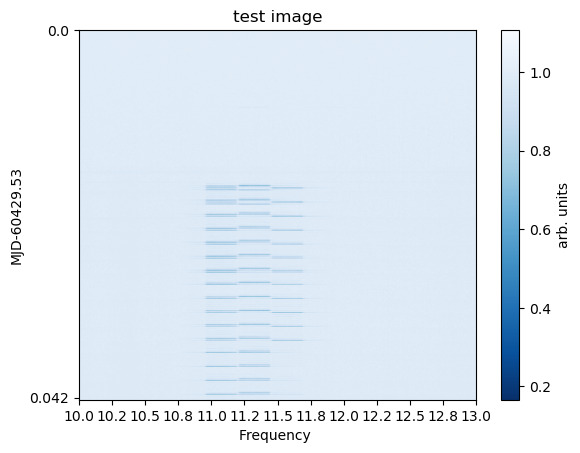

In [8]:
import matplotlib.colors as colors
if mode == 'Correlator':  
    stokesI = (dataxx + datayy)/2
else:
    stokesI = data
bandpass=np.mean(stokesI[:200,:],axis=0)
print(data.shape)
stokesI = stokesI/bandpass
# stokesI=10*np.log10(stokesI)### convert to dB
plt.title('test image')
plt.imshow(stokesI, aspect='auto', cmap='Blues_r', norm=colors.Normalize(vmin=stokesI.min(), vmax=stokesI.max()))
plt.colorbar(label='arb. units')
plt.xlabel('Frequency ')
plt.xticks(np.arange(0, stokesI.shape[1], 250), np.round(f_GHz[::250],1))
plt.ylabel(f'MJD-{mjd[0]:.2f}')
plt.yticks(np.arange(0, stokesI.shape[0], 2000), np.round(mjd[::2000]-mjd[0],3))
plt.show()

### read all files and process them

In [9]:
def hdf5_to_npz(filename):
    realname=filename.split('/')[-1]
    reallabel=realname.split('.')[0]
    reallabel=reallabel.split(' ')[0] ## remove gary's name this should be adjusted if needed
    #------------------
    # print('filename number %d of %d'%(filename_idx,len(filenameL)))
    print('Loaded %s'%filename)
    if 'SouthWest' in filename:
        print('SW')
        mode = 'SA_SW'

    elif 'NorthEast' in filename:
        mode = 'SA_NE'
    else:
        print('Correlator mode')
        mode = 'Correlator'
    print('Mode: '+ mode)
    if 'Corr' in filename:    
        aveX, f_GHz, tUtcBytes, az_degX, el_degX, mjd,\
                    satTles, aveY, az_degY, el_degY, mjd,\
                    XYave, hdrD= getCorrData(filename)
        f_corr = f_GHz
        f_GHz=np.linspace(10.7,10.7+2,len(f_GHz))
        mjd_corr = mjd
        t = bytes2mdates(tUtcBytes)
        t = (t-t[0])*3600*24
        t_corr = np.copy(t)

        # if 'XX' in mode:
            # change here for using aveX, aveY or XYave
        dataxx = (np.abs(aveX)/aveX.shape[1])
        xxaz_deg = np.array(az_degX)
        xxel_deg = np.array(el_degX)
        xxaz_deg[xxaz_deg<0] =  xxaz_deg[xxaz_deg<0]+360
        xxaz_deg = xxaz_deg - xxaz_deg//360*360
        np.savez(f'./npdata/dataset_{mode}_XX_{reallabel}.npz',data=dataxx, telescope_az = xxaz_deg, telescope_el = xxel_deg, f_GHz = f_GHz, mjd = mjd)

        # elif 'YY' in mode:
            # change here for using aveX, aveY or XYave
        datayy = (np.abs(aveY)/aveY.shape[1])
        yyaz_deg = np.array(az_degY)
        yyel_deg = np.array(el_degY)
        yyaz_deg[yyaz_deg<0] =  yyaz_deg[yyaz_deg<0]+360
        yyaz_deg = yyaz_deg - yyaz_deg//360*360
        np.savez(f'./npdata/dataset_{mode}_YY_{reallabel}.npz',data=datayy, telescope_az = yyaz_deg, telescope_el = yyel_deg, f_GHz = f_GHz, mjd = mjd)
        # else:
        dataxy = (np.abs(XYave)/XYave.shape[1])
        xyaz_deg = (np.array(az_degY)+ np.array(az_degX))/2
        xyel_deg = (np.array(el_degY)+ np.array(el_degX))/2
        xyaz_deg[xyaz_deg<0] =  xyaz_deg[xyaz_deg<0]+360
        xyaz_deg = xyaz_deg - xyaz_deg//360*360
        az_deg=xyaz_deg
        el_deg=xyel_deg
        np.savez(f'./npdata/dataset_{mode}_XY_{reallabel}.npz',data=dataxy, telescope_az = xyaz_deg, telescope_el = xyel_deg, f_GHz = f_GHz, mjd = mjd)
        stokesI = (dataxx + datayy)/2
        stokesQ = (dataxx - datayy)/2
        stokesU = np.real(dataxy)
        stokesV = np.imag(dataxy)
        np.savez(f'./npdata/dataset_{mode}_I_{reallabel}.npz',data=stokesI, telescope_az = xyaz_deg, telescope_el = xyel_deg, f_GHz = f_GHz, mjd = mjd)
        np.savez(f'./npdata/dataset_{mode}_Q_{reallabel}.npz',data=stokesQ, telescope_az = xyaz_deg, telescope_el = xyel_deg, f_GHz = f_GHz, mjd = mjd)
        np.savez(f'./npdata/dataset_{mode}_U_{reallabel}.npz',data=stokesU, telescope_az = xyaz_deg, telescope_el = xyel_deg, f_GHz = f_GHz, mjd = mjd)
        np.savez(f'./npdata/dataset_{mode}_V_{reallabel}.npz',data=stokesV, telescope_az = xyaz_deg, telescope_el = xyel_deg, f_GHz = f_GHz, mjd = mjd)
        
    else:    
        ave_dBm, max_dBm, min_dBm,\
            f_GHz, tUtcBytes, az_deg, el_deg, mjd,\
            satTles, hdrD = getMonData(filename)
        data = np.array(max_dBm)
        # data = np.array(ave_dBm)
        az_deg = np.array(az_deg)
        el_deg = np.array(el_deg) 
        mjd_sa = mjd
        f_sa = f_GHz
        t = bytes2mdates(tUtcBytes)
        t = (t-t[0])*3600*24
        t_sa = np.copy(t)
        
        #make sure that the Az range is within 0-360
        az_deg[az_deg<0] =  az_deg[az_deg<0]+360
        az_deg = az_deg - az_deg//360*360


        np.savez(f'./npdata/dataset_{mode}_{reallabel}.npz',data=data, telescope_az = az_deg, telescope_el = el_deg, f_GHz = f_GHz, mjd = mjd)

    print(f'{realname} converted to npz')
    print('---------------------------------')
            

    if mode == 'Correlator':  
        return dataxx,datayy,dataxy, az_deg, el_deg, f_GHz, mjd

    return data, az_deg, el_deg, f_GHz, mjd


In [10]:
for filename in fileL:
    hdf5_to_npz(filename)


Loaded /Users/h.qiu/SKAO Dropbox/Qiu Hao/smg_work/09_Onsala_starlink_measurements/OTTNorthEastUpperband-2024-04-29T12_37_46 Gary Hovey.hdf5
Mode: SA_NE


FileNotFoundError: [Errno 2] No such file or directory: './npdata/dataset_SA_NE_OTTNorthEastUpperband-2024-04-29T12_37_46.npz'